In [1]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
import pandas as pd
import numpy as np
np.random.seed(0)
from sklearn.model_selection import GridSearchCV, StratifiedKFold  # , cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support, confusion_matrix  # , classification_report
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from scipy import integrate


In [39]:
DATA_PATH = "./data/features/flux_v3/"

In [40]:
diego_t = pd.read_pickle(DATA_PATH+"/T.pickle")
diego_nt = pd.read_pickle(DATA_PATH+"/NT.pickle")

In [41]:
diego_t['bin_class'] = diego_t['Class']=="SN"
diego_t["fact_Class"] = pd.factorize(diego_t['bin_class'])[0]
diego_nt['bin_class'] = diego_nt['Class']=="SN"
diego_nt["fact_Class"] = pd.factorize(diego_nt['bin_class'])[0]

In [42]:
diego_t.head()

,,Class,ObsCount,amplitude,beyond1st,flux_percentile_ratio_mid20,flux_percentile_ratio_mid35,flux_percentile_ratio_mid50,flux_percentile_ratio_mid65,flux_percentile_ratio_mid80,kurtosis,...,poly4_t2,poly4_t3,poly4_t4,skew,small_kurtosis,std,stetson_j,stetson_k,bin_class,fact_Class
ID,copy_num,,,,,,,,,,,,,,,,,,,,,
TranID1409030010044114444,0,SN?,13,6.606619e-20,0.153846,0.067363,0.145074,0.159700,0.296120,0.519169,0,...,-4.924016e-26,-3.251950e-29,4.063888e-32,0,-3.927273,3.625611e-20,2.653184,0.674821,False,0
TranID1209210010044118805,0,Flare,68,4.046382e-17,0.014706,0.043604,0.077573,0.111773,0.140895,0.215354,0,...,7.742926e-24,1.676101e-28,-3.274201e-30,0,-3.139161,9.811163e-18,351.818004,0.715629,False,0
TranID1310250040014131234,0,SN,185,4.205281e-18,0.043243,0.025245,0.061235,0.082459,0.126591,0.314544,0,...,-1.044870e-24,5.970998e-28,6.915890e-31,0,-3.049541,1.364362e-18,21.488547,0.663141,True,1
TranID801010040034114166,0,Var?,26,1.704704e-19,0.038462,0.178109,0.267323,0.307942,0.636355,0.910583,0,...,8.845517e-26,4.664982e-30,-3.847573e-32,0,-3.396739,6.714612e-20,5.465193,0.710980,False,0
TranID1011080040044131101,0,SN,41,3.023817e-19,0.121951,0.031154,0.055487,0.073229,0.405480,0.874745,0,...,-1.303991e-25,-2.135346e-29,6.109557e-32,0,-3.238866,1.047484e-19,10.394458,0.710591,True,1


In [21]:
diego_t.head()

,,Class,ObsCount,amplitude,beyond1st,flux_percentile_ratio_mid20,flux_percentile_ratio_mid35,flux_percentile_ratio_mid50,flux_percentile_ratio_mid65,flux_percentile_ratio_mid80,kurtosis,...,poly4_t2,poly4_t3,poly4_t4,skew,small_kurtosis,std,stetson_j,stetson_k,bin_class,fact_Class
ID,copy_num,,,,,,,,,,,,,,,,,,,,,
TranID809290121154131085,3,SN,19,6.010130e-16,0.052632,0.000114,0.000291,0.000428,0.000530,0.020584,0,...,-1.306003e-20,-2.997369e-24,1.492962e-26,0,-3.573529,2.756043e-16,5561.772897,0.480369,True,1
TranID711031091234108744,6,Ast?,5,4.999350e-20,0.400000,0.255031,0.446305,0.637578,0.773486,0.909395,0,...,-1.856391e-16,5.713816e-19,-7.082542e-23,0,-8.000000,4.236560e-20,0.092331,0.833965,False,0
TranID1310241630244134804,10,Unknown,84,5.323451e-18,0.107143,0.038130,0.064197,0.106319,0.151000,0.402147,0,...,-2.917525e-24,3.602548e-27,2.762753e-30,0,-3.111563,1.975675e-18,43.004178,0.199912,False,0
TranID1112291120524129371,9,LPV,458,5.373549e-14,0.222707,0.096141,0.184049,0.249861,0.476119,0.821909,0,...,-2.141519e-20,2.170168e-24,1.109105e-26,0,-3.019795,2.078542e-14,72.677327,0.481423,False,0
TranID1104271460494129915,0,HPM,100,6.101802e-19,0.160000,0.154260,0.314767,0.429300,0.593015,0.751878,0,...,5.863664e-25,3.606502e-28,-9.450684e-31,0,-3.093099,1.556850e-19,0.317101,0.491474,False,0


### Scramble the data

In [37]:
diego_t = diego_t.sample(frac=1)
diego_nt = diego_nt.sample(frac=1)

In [33]:
all_train, all_test= train_test_split(diego_t,test_size = 0.25)

It never hurts to rescramble....

In [34]:
all_train = all_train.sample(frac=1)
all_test = all_test.sample(frac=1)

In [35]:
all_test.head()

,,Class,ObsCount,amplitude,beyond1st,flux_percentile_ratio_mid20,flux_percentile_ratio_mid35,flux_percentile_ratio_mid50,flux_percentile_ratio_mid65,flux_percentile_ratio_mid80,kurtosis,...,poly4_t2,poly4_t3,poly4_t4,skew,small_kurtosis,std,stetson_j,stetson_k,bin_class,fact_Class
ID,copy_num,,,,,,,,,,,,,,,,,,,,,
TranID1409030040054108840,9,SN,22,2.994092e-20,0.181818,0.044335,0.082286,0.194572,0.410118,0.958185,0,...,-2.460929e-26,-1.602805e-29,1.455960e-32,0,-3.481579,1.745695e-20,2.584441,0.731022,True,1
TranID1209141090054139367,10,AGN?,96,8.228342e-18,0.010417,0.068969,0.113656,0.173391,0.304999,0.603298,0,...,1.084127e-24,2.689856e-27,8.206898e-31,0,-3.097117,1.677642e-18,41.210356,0.321553,False,0
TranID1401041150114109714,9,AGN,44,4.866736e-20,0.272727,0.074206,0.148757,0.382454,0.539299,0.783118,0,...,6.450373e-26,4.543571e-29,1.148828e-32,0,-3.221254,2.171316e-20,3.442188,0.477291,False,0
TranID1005100040634116249,5,CV,287,1.770866e-13,0.083624,0.000227,0.000551,0.000954,0.002500,0.090977,0,...,8.621446e-21,-2.409551e-23,-1.094261e-26,0,-3.031727,5.915574e-14,2124.721622,0.698740,False,0
TranID1408310011164108034,4,SN,345,2.562825e-19,0.257971,0.148689,0.234902,0.374212,0.490494,0.726399,0,...,-3.124050e-27,1.345060e-29,2.988734e-33,0,-3.026341,6.707210e-20,0.850809,0.507641,True,1


## Remove oversampled data on test to reduce bias


In [48]:
all_test = all_test.iloc[all_test.index.get_level_values('copy_num') == str(0)]

In [49]:
features = all_train.columns[2:-2]
print(features)
y_train = np.array(all_train['fact_Class'])
y_test = np.array(all_test['fact_Class'])

Index(['amplitude', 'beyond1st', 'flux_percentile_ratio_mid20',
       'flux_percentile_ratio_mid35', 'flux_percentile_ratio_mid50',
       'flux_percentile_ratio_mid65', 'flux_percentile_ratio_mid80',
       'kurtosis', 'max_slope', 'median_absolute_deviation',
       'median_buffer_range_percentage', 'pair_slope_trend',
       'pair_slope_trend_last_30', 'percent_amplitude',
       'percent_difference_flux_percentile', 'poly1_t1', 'poly2_t1',
       'poly2_t2', 'poly3_t1', 'poly3_t2', 'poly3_t3', 'poly4_t1', 'poly4_t2',
       'poly4_t3', 'poly4_t4', 'skew', 'small_kurtosis', 'std', 'stetson_j',
       'stetson_k'],
      dtype='object')


In [50]:
print(len(y_train))
print(len(y_test))


35219
1070


## Train the algorithm

In [51]:
clf = RandomForestClassifier(n_estimators=50,random_state=0, class_weight='balanced')
clf.fit(all_train[features], y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [52]:
clf.score(all_test[features],y_test)

0.8261682242990654

In [53]:
preds = clf.predict(all_test[features])
pd.crosstab(preds, y_test, rownames=['Predicted '], colnames=['Actual '])

Actual,0,1
Predicted,,
0,683,136
1,50,201


Text(0,0.5,'precision')

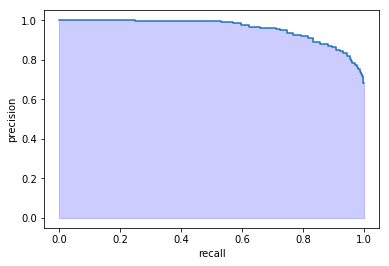

In [54]:
# plt.style.use(['dark_background'])
preds1 = clf.predict_proba(all_test[features])
precision, recall, _ = precision_recall_curve(y_test, preds1[:,0],pos_label=0)

plt.step(recall,precision)
plt.fill_between(recall, precision,step='pre', alpha=0.2,
                 color='b')
plt.xlabel('recall')
plt.ylabel('precision')


In [55]:
integrate.trapz(precision[::-1],recall[::-1])

0.9561384838783016

In [56]:

f1_score(np.array(preds),np.array(y_test))

0.6836734693877551

# Lets mix the non-transients

In [57]:
alldata = pd.concat([diego_t,diego_nt])

In [58]:
alldata = alldata.sample(frac=1)

In [59]:
all_train, all_test= train_test_split(alldata,test_size = 0.25)

In [62]:
all_test = all_test.iloc[all_test.index.get_level_values('copy_num') == str(0)]

In [63]:
all_train = all_train.sample(frac=1)
all_test = all_test.sample(frac=1)

In [64]:
features = all_train.columns[2:-2]
print(features)
y_train = np.array(all_train['fact_Class'])
y_test = np.array(all_test['fact_Class'])

Index(['amplitude', 'beyond1st', 'flux_percentile_ratio_mid20',
       'flux_percentile_ratio_mid35', 'flux_percentile_ratio_mid50',
       'flux_percentile_ratio_mid65', 'flux_percentile_ratio_mid80',
       'kurtosis', 'max_slope', 'median_absolute_deviation',
       'median_buffer_range_percentage', 'pair_slope_trend',
       'pair_slope_trend_last_30', 'percent_amplitude',
       'percent_difference_flux_percentile', 'poly1_t1', 'poly2_t1',
       'poly2_t2', 'poly3_t1', 'poly3_t2', 'poly3_t3', 'poly4_t1', 'poly4_t2',
       'poly4_t3', 'poly4_t4', 'skew', 'small_kurtosis', 'std', 'stetson_j',
       'stetson_k'],
      dtype='object')


In [65]:
print(len(y_train))
print(len(y_test))


46614
4798


In [66]:
clf = RandomForestClassifier(n_estimators=50,random_state=0, class_weight='balanced')
clf.fit(all_train[features], y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [67]:
clf.score(all_test[features],y_test)

0.9416423509795748

In [68]:
preds = clf.predict(all_test[features])
pd.crosstab(preds, y_test, rownames=['Predicted '], colnames=['Actual '])

Actual,0,1
Predicted,,
0,4386,206
1,74,132


Text(0,0.5,'precision')

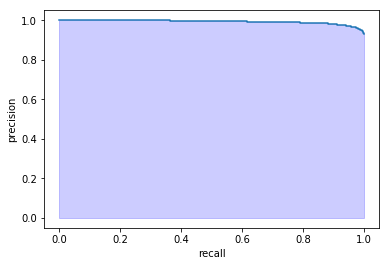

In [69]:
# plt.style.use(['dark_background'])
preds1 = clf.predict_proba(all_test[features])
precision, recall, _ = precision_recall_curve(y_test, preds1[:,0],pos_label=0)

plt.step(recall,precision)
plt.fill_between(recall, precision,step='pre', alpha=0.2,
                 color='b')
plt.xlabel('recall')
plt.ylabel('precision')


In [70]:
integrate.trapz(precision[::-1],recall[::-1])

0.9916881514867125

In [71]:
f1_score(np.array(preds),np.array(y_test))

0.4852941176470589